# Assignment 2a Due

In this assigment you will explore and become familiar with writing and using algorithms to numerically approxomate definite integrals.

Assignment Overview:
* Impliment your own midpoint, trapazoid, and Simpson's rule integration algorithms
* Use those to solve a definite integral
* Compare your algorithms to those from scipy
* Compare all approximate solutions to the exact solutions


You can import only the following packages: numpy, math, scipy, matplotlib.pyplot

In [1]:
#your import cell
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import integrate

Now we can define our integration algorithms

In [2]:
#define midpoint rule
def midpointRule(f,x0,xn,n):
    dx = (xn-x0)/float(n)
    area = dx*math.fsum(f(x0 + (i+0.5)*dx) for i in range (0,n))
    return area

In [3]:
#define trapazoidal rule
def trapazoidalRule(f,x0,xn,n):
    dx = (xn-x0)/float(n)
    area = dx*math.fsum(0.5*(f(x0 + (i*dx))+f(x0 + (i+1)*dx)) for i in range (0,n))
    return area

In [4]:
#define simpson's rule
def simpsonRule(f,x0,xn,n):
    dx = (xn-x0)/float(n)
    sodd = 0
    seven = 0
    for i in range(1,n,2):
        sodd += 4*f(x0 + i*dx)
    for j in range(2,n-1,2):
        seven += 2*f(x0 + (j*dx))
    area = (dx/3.0)*(f(x0) + sodd + seven + f(xn))
    return area

# Question 
Sanity checking your code is very important. How can you check that your functions are working properly?

Having a clear description of what the function expects in terms of arguments is a good rule of thumb when dealing with complex functions. That being said we can use the try-except block that allows users to handle exceptions. This is done by placing the operation that can raise an exception in the try section, and specificaly noting the expected exceptions in the except section. Doing this will allow a function to run regardless of any specified exceptions.

For this notebook assigment we would like to solve the integral\
$\int_{a}^{b} \frac{2}{(2^2 + x^2)^{3/2}}dx$

# Question
Have you seen an integral like this before in physics? From where?

Yes, when evaluating the electric field of point charges or of a continuous charge distribution, an integral of this form is typically seen.

Solve the above integral using the numerical integrations that you wrote. When defining the function we will integrate over do so using python's **lambda** function.

For the integration take $a = 0,\; b = 2,\;$ and we will split it up into 6 partitions.

# Question
What is the exact solution?

In [5]:
#exact solution to the integral
exact_solution = 1/(2*math.sqrt(2))
print("Exact Solution:", exact_solution)

Exact Solution: 0.35355339059327373


In [6]:
#solve the integral using your integration functions
f2 = lambda x : 2/((2**2+x**2)**(3/2))
xmin = 0
xmax = 2
n_part = 6
dx = float((xmin-xmax)/n_part)
print("Midpoint Rule Solution:",midpointRule(f2,xmin,xmax,n_part))
print("Trapazoidal Rule Solution:",trapazoidalRule(f2,xmin,xmax,n_part))
print("Simpson Rule Solution:",simpsonRule(f2,xmin,xmax,n_part))

Midpoint Rule Solution: 0.3538599754585315
Trapazoidal Rule Solution: 0.35293994641413146
Simpson Rule Solution: 0.3535517906244493


Use the trapz and simps methods from scipy's integration library to solve the integral.

Note: Shit+tab at the end of a function in jupyter notebook reveals lots of information about the function.

In [7]:
#scipy integration
x_values = np.linspace(xmin,xmax,n_part+1)
y_values = 2/((2**2+x_values**2)**(3/2))
scipy_trapazoidal = integrate.trapz(y_values,x_values,dx)
scipy_simpson = integrate.simps(y_values,x_values)
print("Scipy Trapazodial Rule Solution:" , scipy_trapazoidal)
print("Scipy Simpson Rule Solution:" , scipy_simpson)

Scipy Trapazodial Rule Solution: 0.35293994641413146
Scipy Simpson Rule Solution: 0.35355179062444925


# Question
How do scipy integrals compare to yours? Support your answer. 

The trapizodial rule algorithm has the same output as scipys trpazidal integration. This is because the trapisodial computation is simple, envolving linear approximations for the curve at each interval. The simpson rule algorithm has basically the identical output as scipys simpson integration. The simpson rule uses polynomials to approximate area, in which both integral methods can be computed farliy easily. A key but obvious difference between the two is with regard to the sheer amount of code needed to express the integration. Scipys integral methods allow for a much more consise execution of the same integral solutions. 

In [8]:
#print the numerical values
print("Midp. :",midpointRule(f2,xmin,xmax,n_part))
print("Trap. :",trapazoidalRule(f2,xmin,xmax,n_part))
print("Simp. :",simpsonRule(f2,xmin,xmax,n_part))
print("ScTrap. :" , scipy_trapazoidal)
print("ScSimp. :" , scipy_simpson)

Midp. : 0.3538599754585315
Trap. : 0.35293994641413146
Simp. : 0.3535517906244493
ScTrap. : 0.35293994641413146
ScSimp. : 0.35355179062444925


Numerically compare your midpoint, trapazoid, and Simpson method results to the exact value by calculating the quantity (approx - exact) / exact for each method. 

In [9]:
#numerical comparisons
def error(approx,exact):
    error_num = (approx-exact)/exact
    return error_num
print("Midp. error:",error(midpointRule(f2,xmin,xmax,n_part),exact_solution))
print("Trap. error:",error(trapazoidalRule(f2,xmin,xmax,n_part),exact_solution))
print("Simp. error:",error(simpsonRule(f2,xmin,xmax,n_part),exact_solution))

Midp. error: 0.0008671529489316845
Trap. error: -0.001735082155803672
Simp. error: -4.525395221761466e-06


# Question
Which method provides the best approximation to the exact solution?

Simpson's rule gives the best approximation to the exact solution. The approximation is off by only -0.0000045!

It is often useful to represent the data graphically. Make a scatter plot showing the percent difference $100 \times \frac{approx. - exact}{exact}$ vs. integration method. Integration method on your x-axis should be strings such as *midpoint, trapazoid, and Simpson*. You should also draw on your plot a line at *y = 0*, which will help guide the eye where the perfect approximation (the exact solution) would sit. 

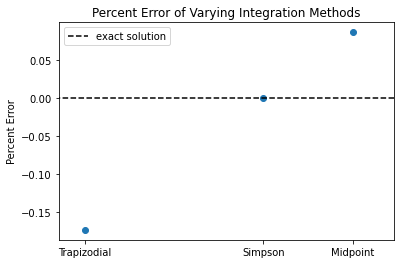

In [10]:
#plot
x = [midpointRule(f2,xmin,xmax,n_part),
    trapazoidalRule(f2,xmin,xmax,n_part),
    simpsonRule(f2,xmin,xmax,n_part)]
y = [100*error(midpointRule(f2,xmin,xmax,n_part),exact_solution),
     100*error(trapazoidalRule(f2,xmin,xmax,n_part),exact_solution),
     100*error(simpsonRule(f2,xmin,xmax,n_part),exact_solution)]
fig = plt.figure()
ax = plt.axes()
plt.title("Percent Error of Varying Integration Methods")
x_strings = ['Midpoint','Trapizodial','Simpson']
plt.xticks(x, x_strings)
ax.scatter(x,y)
xline=[0,1]
yline=[0,0]
ax.plot(xline,yline, linestyle='--', color='black',label="exact solution")
plt.legend()
ax.set(xlim = (.35285,.354), ylabel = 'Percent Error');

Using the scipy *quad* integration method, approximate the following integral

$$\int_{-\infty}^{\infty} e^{-x^{2}} dx$$

Hint: Reference <a href="https://numpy.org/">numpy</a> and see what it has to offer in terms of functions and *special* values

In [11]:
#solve integral above
x_negInf = -np.inf
x_posInf = np.inf
f3 = lambda x : np.e**-(x**2)
exp_integral = integrate.quad(f3,x_negInf,x_posInf)
print("Approximate Solution:", exp_integral)
print("Solution Squared:", exp_integral[0]**2)

Approximate Solution: (1.772453850905516, 1.4202636781317274e-08)
Solution Squared: 3.1415926535897936


# Question
If you square your solution, does the resulting number have any special meaning?

Yes, the square of the solution is approximately equal to the ratio of a circles circumference to its diameter, pi.